In [21]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [3]:
pathways_df = pd.read_csv('data/pathways.csv')
pathways_df.set_index("Object ID", inplace=True)
pathways_df["Reaction-List"] = pathways_df["Reaction-List"].str.split(" // ")
pathways_df["Species"] = pathways_df["Species"].str.split(" // ")
pathways_df["In-Pathway"] = pathways_df["In-Pathway"].str.split(" // ")
pathways_df["Super-Pathways"] = pathways_df["Super-Pathways"].str.split(" // ")
pathways_df

,Pathways,Chimeric?,Common-Name,Credits,Data-Source,Engineered?,Enzymes-Not-Used,Hypothetical-Reactions,In-Pathway,Key-Reactions,...,Reaction-List,Regulated-By,Score,Species,Sub-Pathways,Synonyms,Taxonomic-Range,Variants?,Super-Pathways,Link
Object ID,,,,,,,,,,,,,,,,,,,,,
PWY-6990,PWY-6990,NaN,(+)-camphor biosynthesis,SRI // caspi,NaN,NaN,NaN,NaN,NaN,NaN,...,"[GERANYL-DIPHOSPHATE-CYCLASE-RXN, RXN-13046, +...",NaN,NaN,[TAX-38868],NaN,(<i>R</i>)-camphor biosynthesis,TAX-33090,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
PWY-2467,PWY-2467,NaN,(+)-pisatin biosynthesis,SRI // caspi // O-28 // THE-ARABIDOPSIS-INFORM...,NaN,NaN,NaN,RXN-18746 // RXN-18745 // RXN-16377 // RXN-2054,NaN,NaN,...,"[RXN-18746, RXN-18745, RXN-16377, RXN-16376, R...",NaN,NaN,[TAX-3888],NaN,NaN,TAX-3803,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
PWY-7487,PWY-7487,NaN,(+)-secoisolariciresinol diglucoside biosynthesis,O-28 // hartmut,NaN,NaN,NaN,NaN,NaN,NaN,...,"[RXN-15443, RXN-15442]",NaN,NaN,[TAX-4006],NaN,NaN,TAX-3398,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
PWY-7749,PWY-7749,NaN,(-)-4'-demethyl-epipodophyllotoxin biosynthesis,SRI // caspi,NaN,NaN,NaN,NaN,NaN,NaN,...,"[RXN-17350, RXN-17349, RXN-16344]",NaN,NaN,[TAX-93608],NaN,etoposide aglycone biosynthesis // (-)-4'-desm...,TAX-3398,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
PWY-6991,PWY-6991,NaN,(-)-camphor biosynthesis,SRI // caspi,NaN,NaN,NaN,NaN,NaN,NaN,...,"[RXN-13002, RXN-13047, --BORNEOL-DEHYDROGENASE...",NaN,NaN,"[TAX-301877, TAX-128002]",NaN,(<i>S</i>)-camphor biosynthesis,TAX-33090,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PWY-6288,PWY-6288,NaN,zeaxanthin-&beta;-D-diglucoside biosynthesis,SRI // caspi,NaN,NaN,NaN,NaN,NaN,NaN,...,"[RXN-10673, RXN-10672]",NaN,NaN,"[TAX-549, TAX-553]",NaN,NaN,TAX-2,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
PWY-6265,PWY-6265,NaN,zerumbone biosynthesis,O-28 // pujar,NaN,NaN,NaN,NaN,NaN,NaN,...,"[RXN-10629, RXN-10628, RXN-8415]",NaN,NaN,[TAX-311405],NaN,NaN,TAX-4642,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...
PWY-7694,PWY-7694,NaN,zwittermicin A biosynthesis,SRI // caspi,NaN,NaN,NaN,NaN,NaN,NaN,...,"[RXN-16916, RXN-16915, RXN-18393, RXN-18395, R...",NaN,NaN,"[TAX-1396, TAX-1428]",NaN,NaN,TAX-2,NaN,NaN,HTTPS://metacyc.org/pathway?orgid=META&id=PWY-...


In [31]:
reactions_df = pd.read_csv('data/reactions.csv')
reactions_df["Left"] = reactions_df["Left"].str.split(" // ")
reactions_df["Right"] = reactions_df["Right"].str.split(" // ")
reactions_df["In-Pathway"] = reactions_df["In-Pathway"].str.split(" // ")
reactions_df["Substrates"] = reactions_df["Substrates"].str.split(" // ")
reactions_df["Enzymatic-Reaction"] = reactions_df["Enzymatic-Reaction"].str.split(" // ")
reactions_df.set_index("Object ID", inplace=True)
reactions_df

,Reactions,Substrates,In-Pathway,Right,Reaction-Direction,Systematic-Name,Synonyms,Std-Reduction-Potential,Spontaneous?,Species,...,Cannot-Balance?,Common-Name,Credits,Data-Source,EC-Number,Enzymatic-Reaction,Enzymes-Not-Used,Equilibrium-Constant,Gibbs-0,Left
Object ID,,,,,,,,,,,,,,,,,,,,,
RXN-22670,RXN-22670,"[ACP, CPD-24905, R-3-Isocyanylbutanoyl-ACP, AM...",[RXN-22664],"[R-3-Isocyanylbutanoyl-ACP, AMP, PROTON]",PHYSIOL-LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SRI // caspi,NaN,EC-6.3.2,NaN,NaN,NaN,NaN,"[CPD-24905, ACP]"
RXN-9464,RXN-9464,"[WATER, CPD-10139, CPD-8222]",NaN,[CPD-8222],PHYSIOL-LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,NaN,"(+)-(1S,4R)-limonene-1,2- epoxide hydrolase",NaN,NaN,EC-3.3.2.8,NaN,NaN,NaN,10.286999,"[CPD-10139, WATER]"
RXN-10899,RXN-10899,"[NAD, CPD-11868, CPD-11871, NADH, PROTON]",[PWY-6341],"[CPD-11871, NADH, PROTON]",LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SRI // caspi,NaN,NaN,[ENZRXN-16944],NaN,NaN,-0.468170,"[CPD-11868, NAD]"
RXN-10901,RXN-10901,"[NAD, CPD-11870, CPD-11871, NADH, PROTON]",[PWY-6341],"[CPD-11871, NADH, PROTON]",LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,SRI // caspi,NaN,NaN,"[ENZRXN-16948, ENZRXN-16946]",NaN,NaN,-0.468170,"[CPD-11870, NAD]"
RXN-9861,RXN-9861,"[CPD-10639, 2-CL-MUCONATE, PROTON]",NaN,"[2-CL-MUCONATE, PROTON]",REVERSIBLE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EC-5.5.1.7,"[ENZRXN-15675, ENZRXN-15624]",NaN,NaN,9.931763,[CPD-10639]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.2.1.3-RXN,3.2.1.3-RXN,"[WATER, Glycogens, Glucopyranose]",NaN,"[Glycogens, Glucopyranose]",PHYSIOL-LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,T,NaN,SRI // caspi,NaN,EC-3.2.1.3,NaN,NaN,NaN,NaN,"[Glycogens, WATER]"
RXN-24124,RXN-24124,"[WATER, 13-and-16-Sial-Gal-N-glycans, Galactos...",NaN,"[Galactosylated-N-Glycan, N-ACETYLNEURAMINATE]",PHYSIOL-LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,O0-13 // amackie,NaN,EC-3.2.1.18,NaN,NaN,NaN,NaN,"[13-and-16-Sial-Gal-N-glycans, WATER]"
RXN-24125,RXN-24125,"[WATER, Galactosylated-N-Glycan, 24-26-N-linke...",NaN,"[24-26-N-linked-Glycan, GALACTOSE]",PHYSIOL-LEFT-TO-RIGHT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,O0-13 // amackie,NaN,NaN,NaN,NaN,NaN,NaN,"[Galactosylated-N-Glycan, WATER]"


In [99]:
compounds_df = pd.read_csv("data/compounds.csv")
compounds_df.set_index("Object ID", inplace=True)
compounds_df

,Compounds,Accession-1,Anticodon,Appears-In-Left-Side-Of,Appears-In-Right-Side-Of,Bucket-Sequence,Chemical Formula,Circular?,Codons,Cofactors-Of,...,PKa3,Regulated-By,Regulates,Sequence-Length,SMILES,Species,Synonyms,Systematic-Name,Unmapped-Components,Unmodified-Form
Object ID,,,,,,,,,,,,,,,,,,,,,
CPD-25306,CPD-25306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPD-24905,CPD-24905,NaN,NaN,RXN-22670,RXN-22669,NaN,C15H18N6O8P,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C[C@@H]([N+]#[C-])CC(OP(OC[C@H]3(O[C@@H](N1(C2(\C(\N=C/1)=C(N)/N=C\N=2)))[C@H](O)[C@H](O)3))(=O)[O-])=O,NaN,NaN,NaN,NaN,NaN
CPD-20086,CPD-20086,NaN,NaN,NaN,RXN-18793,NaN,C15H26O,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CC(C)[C@@H]1([C@H](O)/C=C(C)/CC/C=C(C)/CC1),NaN,NaN,NaN,NaN,NaN
CPD-20434,CPD-20434,NaN,NaN,NaN,NaN,NaN,C20H34O,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C=C[C@](O)(C)CC[C@@]1(C)([C@H]2([C@](C)(CC[C@H](C)1)C(/C)=C/CC2)),NaN,NaN,NaN,NaN,NaN
CPD-10140,CPD-10140,NaN,NaN,NaN,NaN,NaN,C10H16O,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,C=C([C@@H]1(CC[C@@]2([C@H](C1)O2)(C)))C,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Peptidyl-Carrier-Protein-Group,Peptidyl-Carrier-Protein-Group,NaN,NaN,NaN,RXN-22921,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CC(C)(COP(=O)([O-])OC[C@H](N[a peptidyl-carrier protein])C(=O)[a peptidyl-carrier protein])[C@@H](O)C(=O)NCCC(=O)NCCS,NaN,NaN,NaN,NaN,NaN
CPD-23477,CPD-23477,NaN,NaN,RXN-21592,RXN-21593,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CC(C)(COP(=O)([O-])OC[C@H](N[a <i>holo</i> acp domain within a [polyketide synthase]])C(=O)[a <i>holo</i> acp domain within a [polyketide synthase]])[C@@H](O)C(=O)NCCC(=O)NCCSC(=O)C1(C(O)(C)CC2(\C(\C(=O)1)=C(C3(/C(\C=2)=C\C(\O)=C/C(/O)=3))\O)),NaN,NaN,NaN,NaN,NaN
PKS-ACP-GROUP,PKS-ACP-GROUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CC(C)(COP(=O)([O-])OC[C@H](N[a <i>holo</i> acp domain within a [polyketide synthase]])C(=O)[a <i>holo</i> acp domain within a [polyketide synthase]])[C@@H](O)C(=O)NCCC(=O)NCCS,NaN,[polyketide synthase] group // [pks-acp]-group,NaN,NaN,NaN


In [24]:
def plot_reaction_graph(adj_matrix, reactions, compounds):
    node_labels = compounds + reactions
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
    mapping = dict(zip(range(len(node_labels)), node_labels))
    G = nx.relabel_nodes(G, mapping)
    group_colors = ['lightblue'] * len(compounds) + ['lightgreen'] * len(reactions)
    plt.figure(figsize=(12, 10))
    pos = graphviz_layout(G, prog='dot')  
    nx.draw(G, pos, with_labels=True, node_color=group_colors, node_size=2000, edge_color='gray', linewidths=1, font_size=10)
    plt.title("Graph Representation of Reactions and Compounds")
    plt.show()

In [16]:
def make_pathway_graph(
        pathway_id: str,
):
    pathway = pathways_df.loc[pathway_id]
    reactions = reactions_df.loc[pathway["Reaction-List"]]
        
    edges, compound_v, reaction_v = set(), set(), set()
    for i, reaction in reactions.iterrows():
        reaction_v.add(i)
        for l in reaction["Left"]:
            compound_v.add(l)
            edges.add((l, i))
        for r in reaction["Right"]:
            compound_v.add(r)
            edges.add((i, r))
    
    vertices = list(compound_v) + list(reaction_v)
    adj_matrix = np.zeros((len(vertices), len(vertices)))
    for edge in edges:
        adj_matrix[vertices.index(edge[0]), vertices.index(edge[1])] = 1
        
    return adj_matrix, list(reaction_v), list(compound_v)

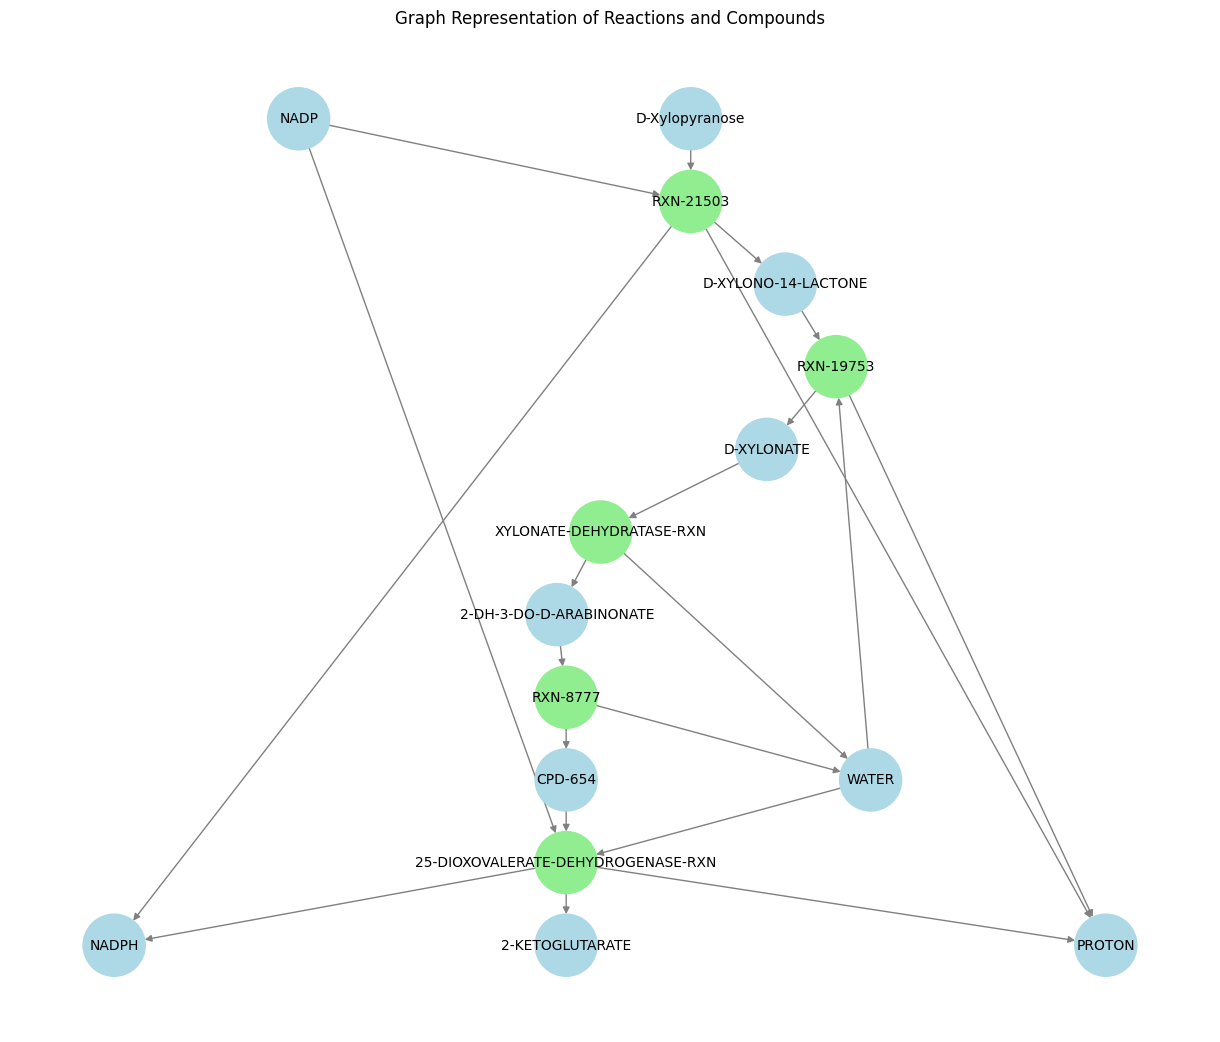

In [25]:
plot_reaction_graph(*make_pathway_graph("PWY-6760"))

In [86]:
def make_pathway_graph_no_reactions(
        pathway_id: str,
):
    pathway = pathways_df.loc[pathway_id]
    reactions = reactions_df.loc[pathway["Reaction-List"]]
        
    edges, compound_v = set(), set()
    for i, reaction in reactions.iterrows():
        for l in reaction["Left"]:
            compound_v.add(l)
            for r in reaction["Right"]:
                compound_v.add(r)
                edges.add((l, r))
    
    vertices = list(compound_v) 
    adj_matrix = np.zeros((len(vertices), len(vertices)))
    for edge in edges:
        adj_matrix[vertices.index(edge[0]), vertices.index(edge[1])] = 1
        
    return adj_matrix, list(compound_v), []

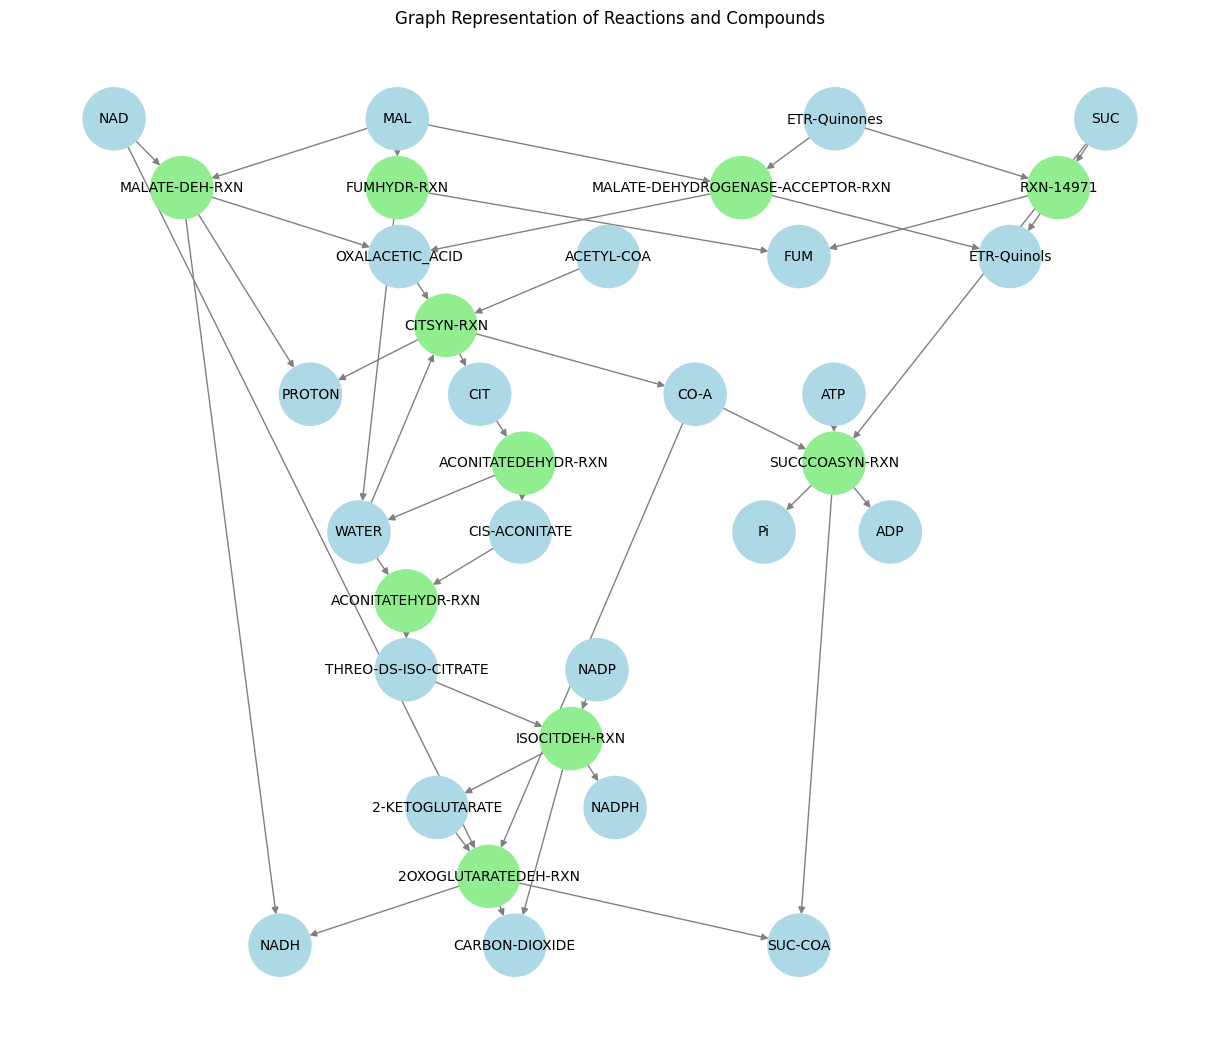

In [89]:
plot_reaction_graph(*make_pathway_graph("TCA"))

In [33]:
substrates_count = {}

for substrates in reactions_df["Substrates"]:
    for substrate in substrates:
        if substrate in substrates_count:
            substrates_count[substrate] += 1
        else:
            substrates_count[substrate] = 1
            
compound_popularity = pd.Series(substrates_count, name="Count").sort_values(ascending=False)
compound_popularity

PROTON                    11069
WATER                      8065
OXYGEN-MOLECULE            3193
ATP                        1584
NADPH                      1481
                          ...  
CETRAXATE                     1
CETRAXATE-BENZYL-ESTER        1
CPD-9133                      1
CPD-16353                     1
CPD-20887                     1
Name: Count, Length: 17653, dtype: int64

In [66]:
def remove_compounds_from_graph(
        adj_matrix, reactions, compounds, to_remove
):
    all_labels = compounds + reactions
    indices_to_keep = [i for (i, x) in enumerate(all_labels) if x not in to_remove]
    
    adj_matrix = adj_matrix[indices_to_keep, :][:, indices_to_keep]
    reactions = [r for r in reactions if r not in to_remove]
    compounds = [c for c in compounds if c not in to_remove]
    
    return adj_matrix, reactions, compounds


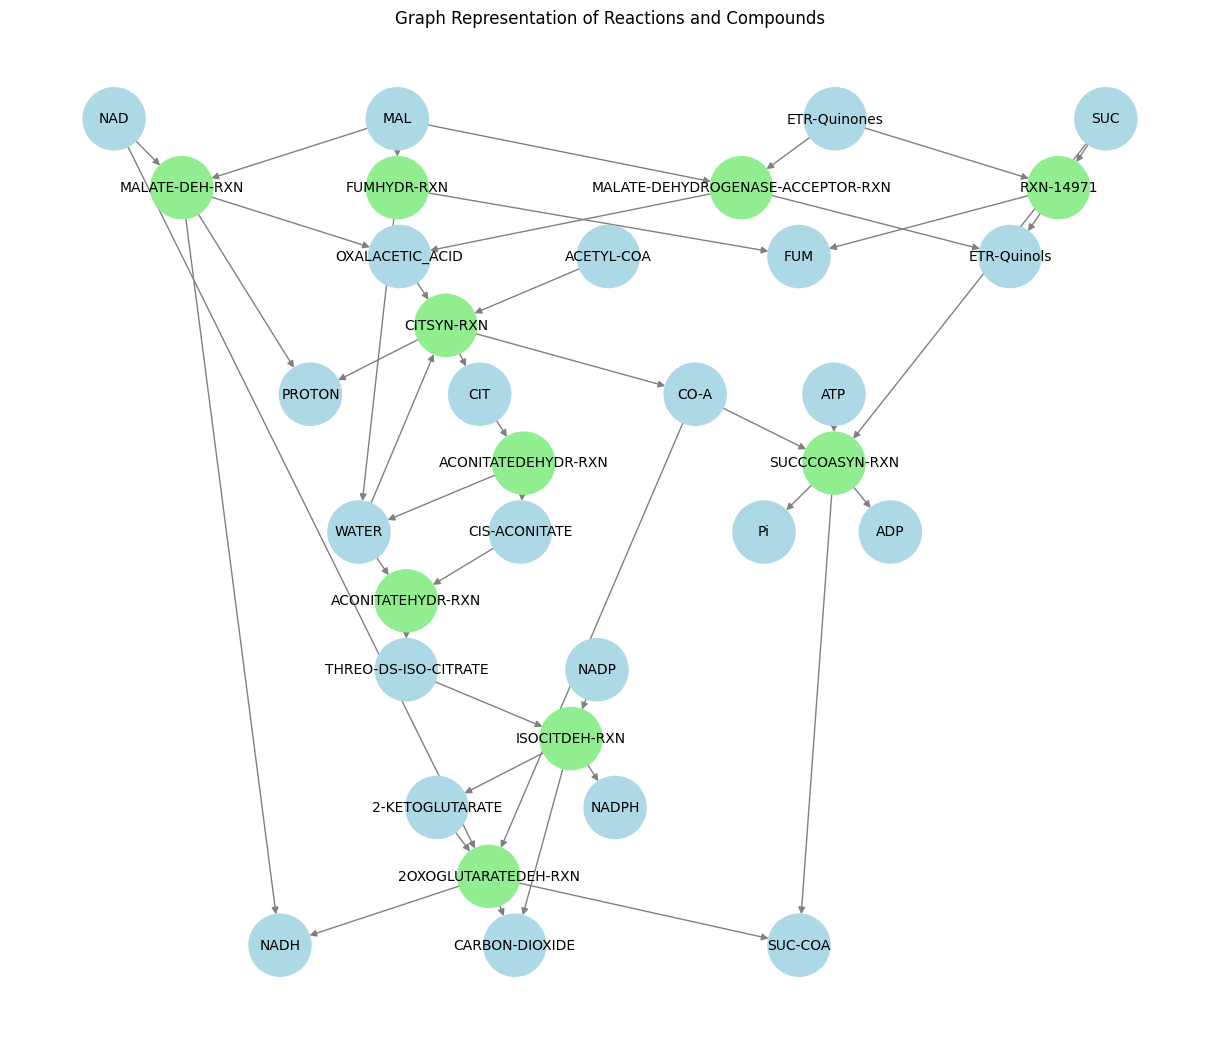

In [77]:
plot_reaction_graph(
    *remove_compounds_from_graph(
        *make_pathway_graph("TCA"),
        to_remove=list(compound_popularity[:0].index)
    )
)

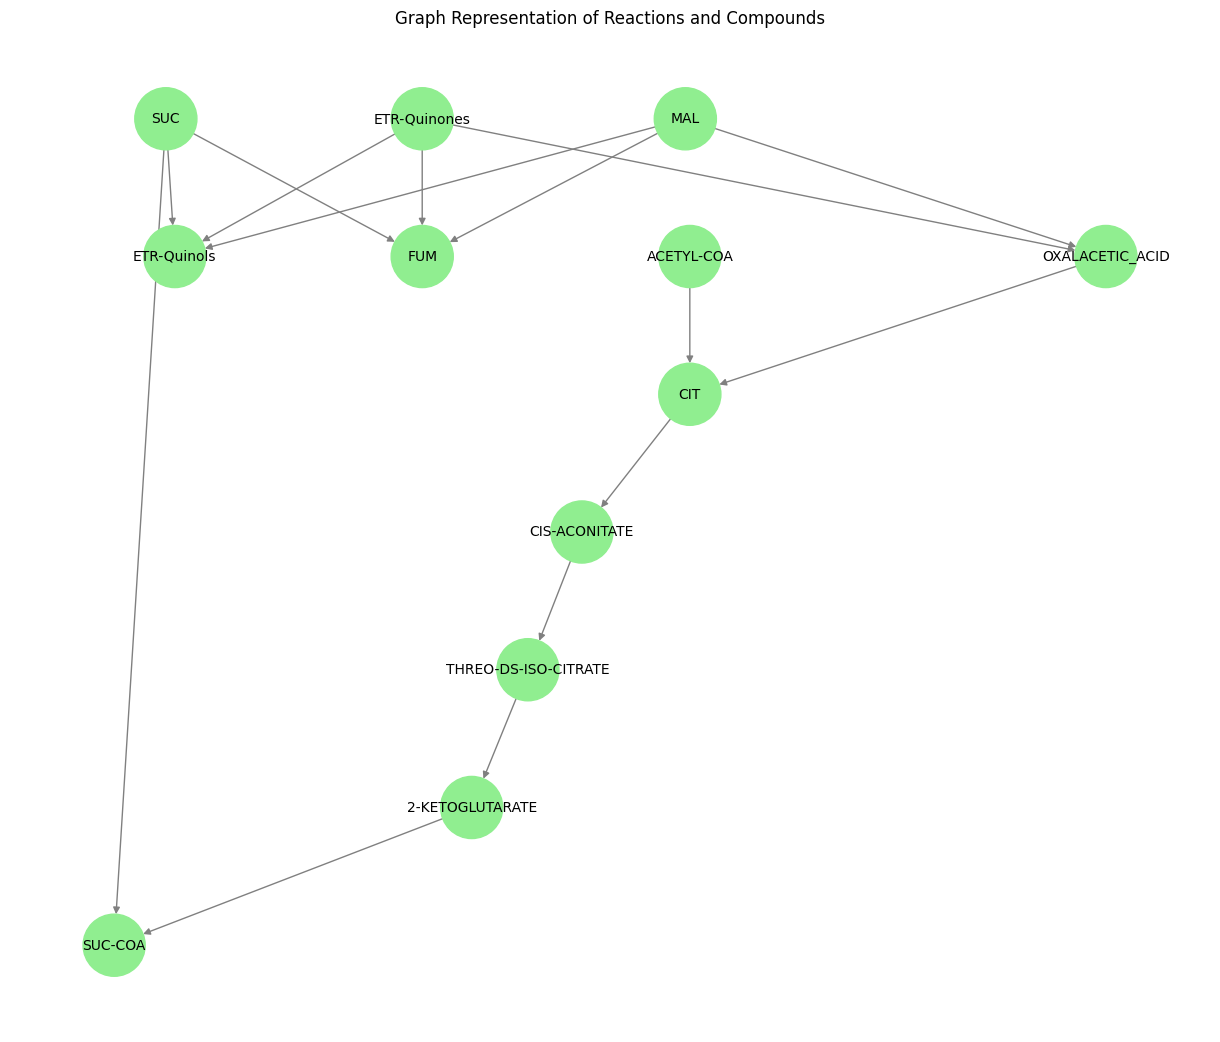

In [87]:
plot_reaction_graph(
    *remove_compounds_from_graph(
        *make_pathway_graph_no_reactions("TCA"),
        to_remove=list(compound_popularity[:15].index)
    )
)

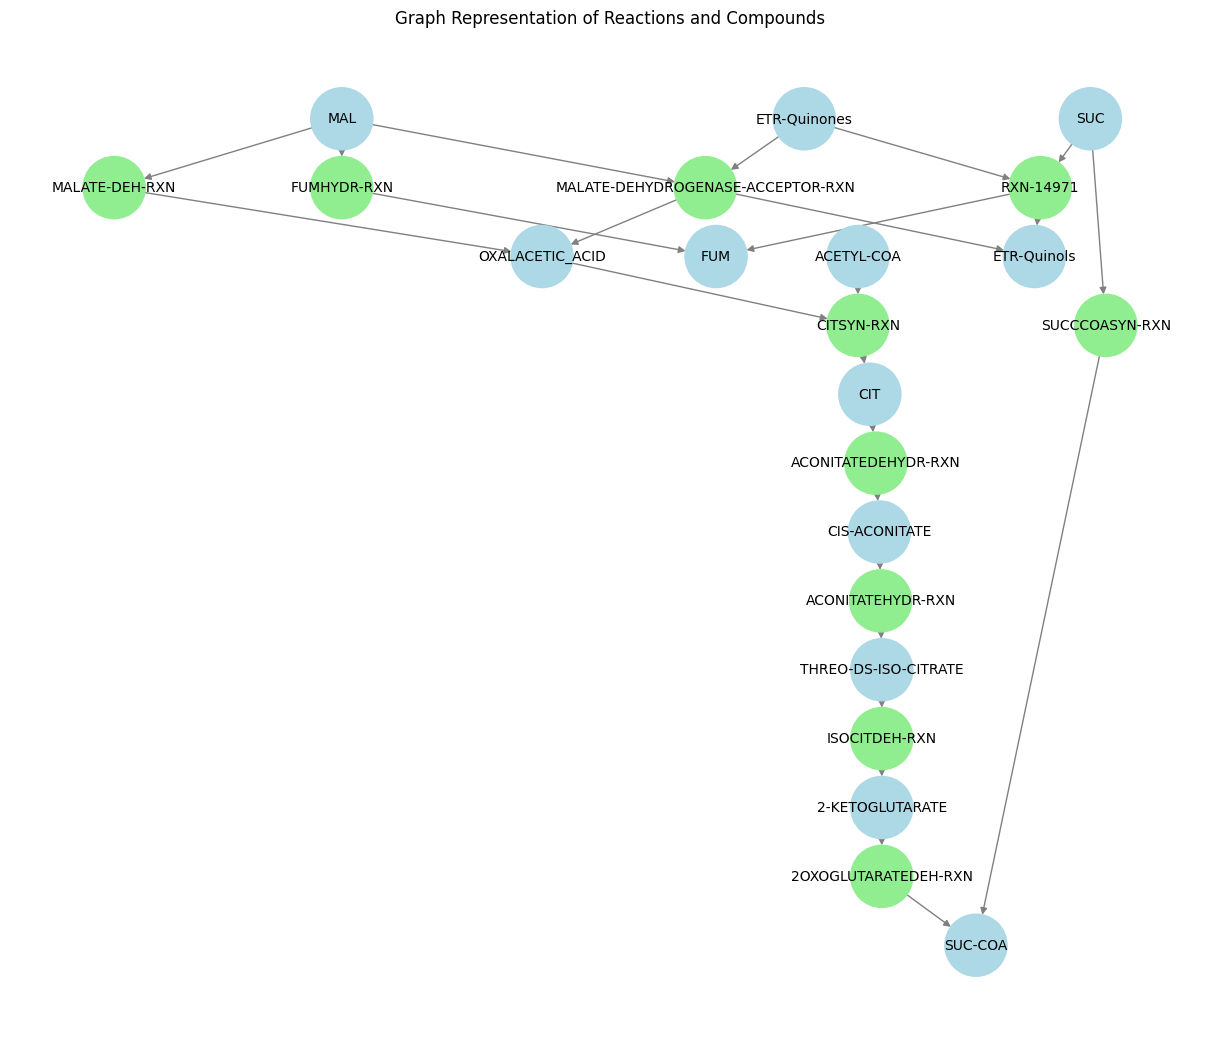

In [93]:
plot_reaction_graph(
    *remove_compounds_from_graph(
        *make_pathway_graph("TCA"),
        to_remove=list(compound_popularity[:15].index)
    )
)

In [111]:
from skfp.fingerprints import AtomPairFingerprint

# TOTAL BASELINE 
def embed_graph(adj_matrix, reactions, compounds):
    compounds = [compounds_df.loc[c, "SMILES"] for c in compounds if c in compounds_df.index]
    fp = AtomPairFingerprint(n_jobs=-1)
    return fp.transform(compounds).sum(axis=0)

In [114]:
embed_graph(*make_pathway_graph("TCA"))

[21:52:38] WARNING: not removing hydrogen atom without neighbors


array([0, 0, 0, ..., 0, 1, 0], dtype=uint64)

In [125]:
species = {}

for i, row in pathways_df.iterrows():
    if type(row["Species"]) == list:
        for s in row["Species"]:
            if s in species:
                species[s].append(i)
            else:
                species[s] = [i]
                
species

{'TAX-38868': ['PWY-6990', 'PWY-5813', 'PWY-7680'],
 'TAX-3888': ['PWY-2467',
  'PWY-2464',
  'PWY-7101',
  'PWY-6147',
  'PWY-6333',
  'PWY-5342',
  'PWY-7033',
  'PWY-6963',
  'PWY-6964',
  'PWY-2261',
  'PWY-3941',
  'PWY-3561',
  'ASPSYNII-PWY',
  'TRIGLSYN-PWY',
  'PWY-2501',
  'PWY-6799',
  'PWY-4381',
  'PWY-3841',
  'PWY-5034',
  'PWY-5070',
  'PWY-5035',
  'PWY-102',
  'GLUCONEO-PWY',
  'GLUT-REDOX-PWY',
  'PWY-4081',
  'GLYCLEAV-PWY',
  'PWY-1042',
  'PWY-1061',
  'PWY-5348',
  'ASPARAGINE-DEG1-PWY',
  'PWY-4002',
  'PWY0-1264',
  'PWY4FS-7',
  'PWY4FS-8',
  'PWY-2',
  'PWY-7199',
  'PWY-7184',
  'PYRUVDEHYD-PWY',
  'PWY-7173',
  'PWY-6932',
  'PWY-6936',
  'PWY-5337',
  'PWY-622',
  'PWY-7238',
  'PWY-3801',
  'PWY-3282',
  'PWY-7345',
  'PWY-4762',
  'PWY-5464',
  'PWY-5156',
  'PWY-6266',
  'PWY-5052',
  'PWY-5053',
  'PHOSLIPSYN2-PWY',
  'PWY-2229',
  'PWY-6305',
  'PWY-7211',
  'PWY-6395',
  'PWY-6612',
  'PWY-6614',
  'PWY-5110',
  'PWY-4',
  'PWY-4841',
  'PWY-82',
  '